# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

Не забываем, что данные не всегда выгружены так, как нам надо. Экспериментальным путем выяснили, что разделителем в исходном файле является знак табуляции.

In [1]:
import warnings
warnings.simplefilter('ignore')
import seaborn as sns

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 100)
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Попробуем вывести общее описание нашего DataFrame:

In [3]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


И просто взглянем на данные в таблице:

In [4]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Теперь проверим как записаны населенные пункты

In [5]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

<b>Вывод:</b>

Данные выглядят вполне "нормально" для анализа, но есть некоторые недочеты:
- есть пропуски. Как "логичные" - поля is_apartment, balcony, airports_nearest, parks_nearest и т.д. (т.е которые просто могут быть не заполнены ввиду отсутствия признака), так и "нелогичные" - поля ceiling_height, living_area и т.д. (т.е которые по определению должны содержать какое-либо значение). Со всем этим придется разобраться в предобработке;
- дату в first_day_exposition нужно принудительно привести к типу даты, т.к. сейчас там строка;
- поля ponds_nearest, ponds_around3000, parks_nearest, parks_around3000, balcony, floors_total по смыслу целочисленные, но хранятся в виде числа с плавающей точкой. Это потребуется устранить;
- поле is_apartment явно булевого типа, однако хранится сейчас как строка;
- есть артефакты в виде количества комнат равному нулю, высота потолка равная одному метру;
- в названии населенных пунктов очень разнородные данные. Есть разница в описании одного и того же места (например одно написано с ё, другое написано с е). Тут нужно привести к общему виду;

### Шаг 2. Предобработка данных

#### Обработка пропущенных значений

##### Пропуски в столбце с расстоянием до центра cityCenters_nearest

Сначала разберем нужные нам данные, которые получены автоматическиим способом. Первый столбец, где есть пропуски это cityCenters_nearest
Посмотрим сначала на данные в общем.

In [6]:
data[data['cityCenters_nearest'].isnull()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,NaN,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,NaN,False,False,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0


Теперь попробуем сгруппировать по населенным пунктам

In [7]:
(data[data['cityCenters_nearest'].isna()]
 .pivot_table(index='locality_name', values='last_price', aggfunc='count')
 .sort_values(by='last_price',ascending = False)
 .head())

,last_price
locality_name,
посёлок Мурино,522
Всеволожск,398
Гатчина,307
деревня Кудрово,299
Выборг,237


Построим график по городам (чтобы выявить явные закономерности, отсечем единичные случаи)

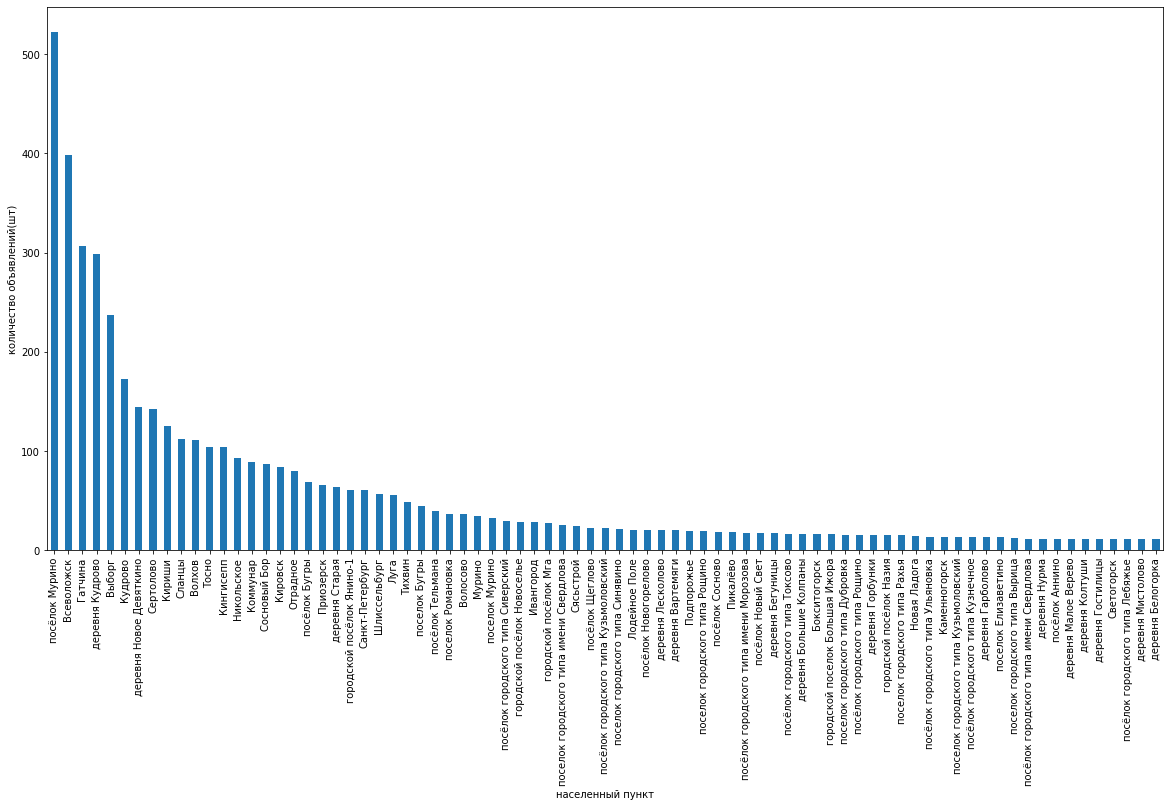

In [8]:

ax = (data[data['cityCenters_nearest'].isna()]
 .pivot_table(index='locality_name', values='last_price', aggfunc='count')
 .sort_values(by='last_price',ascending = False)
 .query('last_price  > 10')
 .plot(y='last_price', kind='bar', figsize=(20,10), legend = False))
ax.set_xlabel('населенный пункт');
ax.set_ylabel('количество объявлений(шт)');

Теперь посмотрим на те столбцы, где данное значение заполнено. Также сгруппируем по населенному пункту

In [9]:
(data[data['cityCenters_nearest'].notna()]
 .pivot_table(index='locality_name', values='last_price', aggfunc='count')
 .sort_values(by='last_price',ascending = False)
 .head())

,last_price
locality_name,
Санкт-Петербург,15660
посёлок Шушары,436
Пушкин,368
Колпино,337
посёлок Парголово,327


И построим график

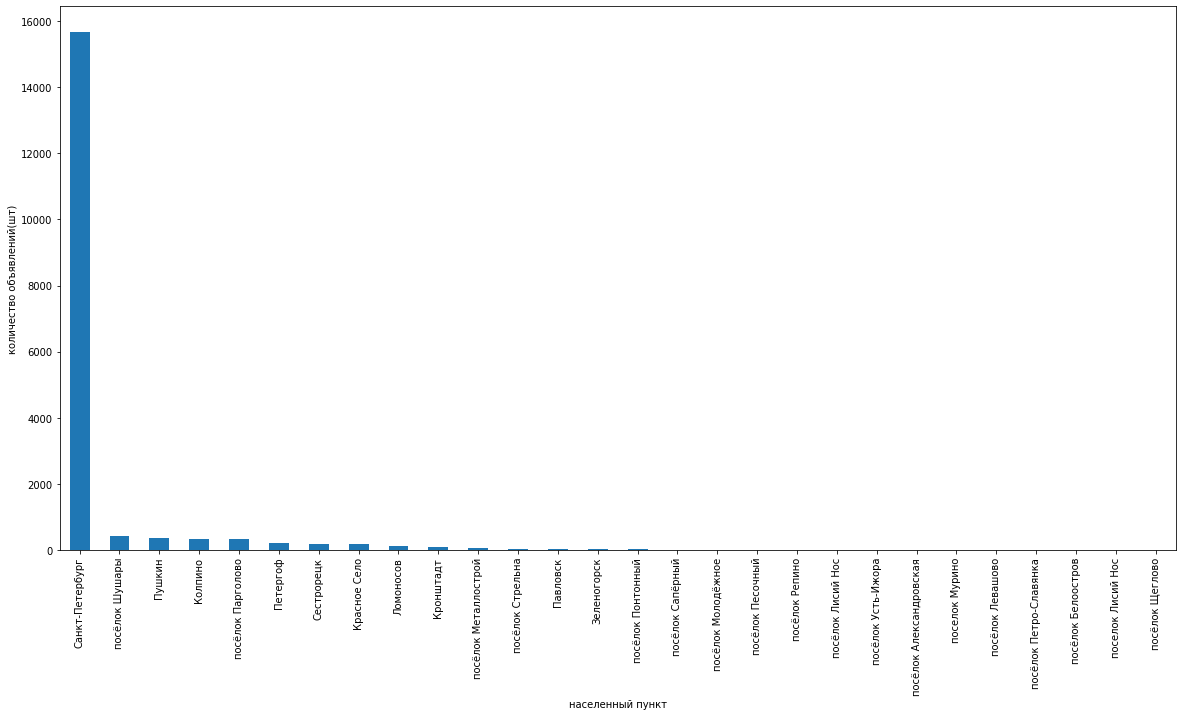

In [10]:
ax = (data[data['cityCenters_nearest'].notna()]
 .pivot_table(index='locality_name', values='cityCenters_nearest', aggfunc='count')
 .sort_values(by='cityCenters_nearest',ascending = False)
 .plot(y='cityCenters_nearest', kind='bar', figsize=(20,10), legend = False))
ax.set_xlabel('населенный пункт');
ax.set_ylabel('количество объявлений(шт)');

Видно, что графики по количеству объявлений с верной геолокацией отражают обратные данные. Попробуем отобразить все на одной картинке. 
Для этого введем столбец cityCenter_nan, которому будем присваивать значение 1, если расстояние до центра не указано и 0, если указано, потом в сводной таблице посчитаем сумму и количество значений этого столбца (что будет отражать отношение всех объявлений к тем, где не указаны геоданные), по которым в конце построим и наложим друг на друга два графика

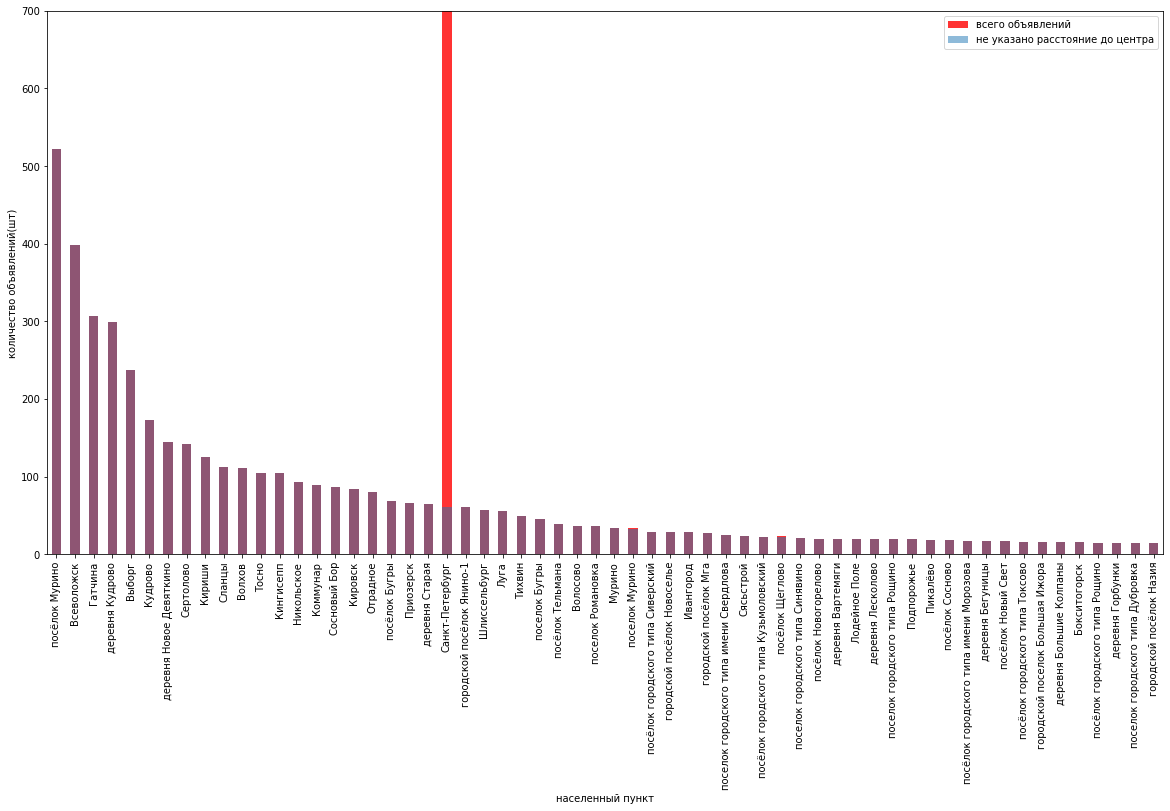

In [11]:
def set_nan_flag_city_center(row):
    if pd.isna(row['cityCenters_nearest']):
        return 1
    return 0

data['cityCenter_nan'] = data.apply(set_nan_flag_city_center, axis=1)

city_center_nan_data = (data.pivot_table(index='locality_name', values=['cityCenter_nan'], 
                  aggfunc=('sum','count'))
 .sort_values(by=('cityCenter_nan', 'sum'), ascending=False).head(60)
)

ax = (city_center_nan_data.plot(y=('cityCenter_nan', 'count'), kind='bar', 
                                figsize=(20,10), alpha=0.8, 
                                label='всего объявлений', 
                                color='red',
                                ylim=(0,700)))

(city_center_nan_data.plot(kind='bar', 
                           y=('cityCenter_nan', 'sum'), alpha=0.5, 
                           label='не указано расстояние до центра', 
                           ax=ax, legend=True)) 
ax.set_xlabel('населенный пункт');
ax.set_ylabel('количество объявлений(шт)');

По цвету наложения видно, что у нас есть четко определенные города с общей проблемой геолокации, т.е. где общее количество объявлений равно количеству объявлений без расстояния до центра. Эту проблему однозначно стоит передать в сотрудникам Яндекс.Карт и Яндекс.Недвижимости.

Сделаем срез для составления отчета

In [12]:
city_center_nan_data.columns=['count','sum']
print(len(city_center_nan_data.query('count == sum')))
city_center_nan_data.query('count == sum').head()


57


,count,sum
locality_name,,
посёлок Мурино,522,522
Всеволожск,398,398
Гатчина,307,307
деревня Кудрово,299,299
Выборг,237,237


Итого получилось 57 таких населенных пунктов.
С этими пропусками по расстояниям не будем делать ничего, т.к. рассчитать их по текущим данным невозможно, а при дальнейшем анализе просто не будем брать их в расчет.

##### Пропуски в столбце с высотой потолков ceiling_height

Взглянем на данные

In [13]:
data[data['ceiling_height'].isnull()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenter_nan
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,False,False,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,1
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,False,False,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,0


Теперь сгруппируем пропуски по городам

In [14]:
(data[data['ceiling_height'].isnull()]
     .pivot_table(index = 'locality_name', values = 'last_price', aggfunc='count')
     .sort_values(by = 'last_price', ascending = False)
     .head(10)
)

,last_price
locality_name,
Санкт-Петербург,5617
посёлок Мурино,322
посёлок Шушары,223
посёлок Парголово,190
деревня Кудрово,177
Гатчина,158
Выборг,139
Пушкин,135
Колпино,135


Сравним со статистикой без пропусков

In [15]:
(data[data['ceiling_height'].notnull()]
     .pivot_table(index = 'locality_name', values = 'last_price', aggfunc='count')
     .sort_values(by = 'last_price', ascending = False)
     .head(10)
)

,last_price
locality_name,
Санкт-Петербург,10104
Всеволожск,272
Пушкин,234
посёлок Шушары,217
Колпино,203
посёлок Мурино,200
Гатчина,149
Петергоф,145
посёлок Парголово,137


Ничего необычного. Вполне возможно, что при размещении объявлений владельцы просто забыли указать этот параметр.
Попробуем найти закономерность. Можно предположить, что в городах все дома относительно однотипные. Посмотрим на сводную таблицу по некоторым параметрам для данных без пропусков. 

In [16]:
(data[data['ceiling_height'].notnull()]
     .pivot_table(index = ['locality_name', 'total_area', 'floors_total'], 
                  values = 'ceiling_height', 
                  aggfunc = ['max', 'median', 'min', 'count'])
     .head(15)
)

max         median  \
                                      ceiling_height ceiling_height   
locality_name total_area floors_total                                 
Бокситогорск  29.0       3.0                    5.00          5.000   
              78.0       4.0                    2.80          2.800   
Волосово      36.0       5.0                    2.55          2.525   
              37.5       5.0                    2.60          2.600   
              39.4       5.0                    2.60          2.600   
              40.2       5.0                    2.55          2.550   
              42.7       4.0                    2.50          2.500   
                         5.0                    2.50          2.500   
              43.0       4.0                    2.50          2.500   
              46.0       5.0                    2.50          2.500   
              47.1       5.0                    2.55          2.550   
              52.0       5.0                    2.50          2.500   
              53.5       5.0                    2.50          2.500   
              54.0       5.0                    2.55          2.550   
              54.2       5.0                    2.55          2.550   

                                                 min          count  
                                      ceiling_height ceiling_height  
locality_name total_area floors_total                                
Бокситогорск  29.0       3.0                    5.00              1  
              78.0       4.0                    2.80              1  
Волосово      36.0       5.0                    2.50              2  
              37.5       5.0                    2.60              1  
              39.4       5.0                    2.60              1  
              40.2       5.0                    2.55              1  
              42.7       4.0                    2.50              1  
                         5.0                    2.50              1  
              43.0       4.0                    2.50              1  
              46.0       5.0                    2.50              1  
              47.1       5.0                    2.55              1  
              52.0       5.0                    2.50              1  
              53.5       5.0                    2.50              1  
              54.0       5.0                    2.55              1  
              54.2       5.0                    2.55              1

Теперь посмотрим стстаистику по самому крупному городу - Санкт Петербургу

In [17]:
(data[(data['ceiling_height'].notnull()) & (data['locality_name'] == 'Санкт-Петербург')]
     .pivot_table(index = ['locality_name', 'total_area', 'floors_total'], 
                  values = 'ceiling_height', 
                  aggfunc = ['max', 'median', 'min', 'count'])
     .head(20)
)

max         median  \
                                        ceiling_height ceiling_height   
locality_name   total_area floors_total                                 
Санкт-Петербург 12.00      5.0                    2.55           2.55   
                13.00      5.0                    3.40           3.40   
                           9.0                    2.60           2.60   
                15.00      9.0                    2.70           2.70   
                17.00      4.0                    2.75           2.75   
                17.20      23.0                   2.77           2.77   
                17.78      9.0                    2.60           2.60   
                18.00      5.0                    3.50           3.05   
                18.80      19.0                   2.75           2.75   
                19.00      5.0                    3.50           3.50   
                           6.0                    3.00           3.00   
                20.00      5.0                    2.50           2.50   
                20.30      6.0                    3.00           3.00   
                21.00      16.0                   2.60           2.60   
                21.40      8.0                    2.90           2.90   
                21.90      8.0                    2.50           2.50   
                22.00      8.0                    2.50           2.50   
                22.70      5.0                    3.33           3.33   
                           9.0                    2.50           2.50   
                23.00      4.0                    2.90           2.90   

                                                   min          count  
                                        ceiling_height ceiling_height  
locality_name   total_area floors_total                                
Санкт-Петербург 12.00      5.0                    2.55              1  
                13.00      5.0                    3.40              1  
                           9.0                    2.60              1  
                15.00      9.0                    2.70              1  
                17.00      4.0                    2.75              1  
                17.20      23.0                   2.77              1  
                17.78      9.0                    2.60              1  
                18.00      5.0                    2.60              2  
                18.80      19.0                   2.75              1  
                19.00      5.0                    3.50              1  
                           6.0                    3.00              1  
                20.00      5.0                    2.50              1  
                20.30      6.0                    3.00              1  
                21.00      16.0                   2.60              1  
                21.40      8.0                    2.90              1  
                21.90      8.0                    2.50              1  
                22.00      8.0                    2.50              1  
                22.70      5.0                    3.33              1  
                           9.0                    2.50              1  
                23.00      4.0                    2.90              1

В целом не все так радужно, т.к. есть "схожие" квартиры, но с очень отличающимися значениями высот потолков, например, 3.5 м и 2.6 м. Если заполнять эти пропуски, то можно повлять на реальную статистику. Поэтому в дальнейщем просто не будем их учитывать.

##### Пропуски в столбце с признаком апартаментов is_apartment

In [18]:
data.query('is_apartment.isnull()').head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenter_nan
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0


In [19]:
data.pivot_table(index='is_apartment', values='last_price', aggfunc='count')

,last_price
is_apartment,
False,2725
True,50


Сейчас у нас 50 квартир явно помеченные как аппартаменты. Найдем признак, который их объединяет.

In [20]:
data.query('is_apartment==True')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenter_nan
543,11,12790000.0,56.60,2018-11-06T00:00:00,2,3.50,3.0,29.400000,1,True,False,False,NaN,NaN,Петергоф,35248.0,30437.0,3.0,53.0,3.0,22.0,NaN,0
916,11,8183000.0,70.00,2018-01-11T00:00:00,2,3.12,3.0,40.000000,3,True,False,False,NaN,2.0,Санкт-Петербург,45796.0,21729.0,0.0,NaN,1.0,754.0,179.0,0
1109,1,34878556.0,95.80,2014-12-09T00:00:00,2,NaN,6.0,58.300000,5,True,False,False,20.00,1.0,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,1572.0,0
1608,12,2150000.0,20.10,2019-01-30T00:00:00,1,NaN,9.0,NaN,1,True,False,False,NaN,NaN,Санкт-Петербург,26646.0,12147.0,0.0,NaN,0.0,NaN,13.0,0
2759,11,7500000.0,152.00,2018-07-27T00:00:00,3,3.00,3.0,NaN,1,True,False,False,NaN,1.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,7.0,1
2975,9,4931398.0,42.90,2018-07-23T00:00:00,1,3.15,4.0,20.390000,3,True,False,False,10.29,NaN,Санкт-Петербург,44870.0,20802.0,0.0,NaN,1.0,792.0,273.0,0
3067,13,6600000.0,95.00,2018-09-08T00:00:00,2,4.50,7.0,45.000000,7,True,False,False,25.00,2.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,96.0,1
3816,4,4779000.0,53.10,2016-05-16T00:00:00,1,NaN,13.0,19.800000,6,True,False,False,15.90,2.0,Санкт-Петербург,19396.0,4516.0,0.0,NaN,1.0,826.0,60.0,0
3951,10,4300000.0,50.00,2019-04-20T00:00:00,1,3.00,11.0,17.000000,9,True,False,False,12.00,2.0,Санкт-Петербург,10143.0,11367.0,0.0,NaN,0.0,NaN,NaN,0
4339,19,6900000.0,72.00,2019-03-25T00:00:00,3,3.50,4.0,70.000000,1,True,False,False,NaN,NaN,Санкт-Петербург,31487.0,4466.0,2.0,353.0,1.0,439.0,22.0,0


Учитывая, что реальный процент апартаментов от общего объема жилья нам неизвестен, а также что апартаменты нельзя точно определить по каким-то явным признакам, эти пропуски мы оставляем.
К тому же в ТЗ особо этот столбец нам не нужен.

##### Пропуски в столбце с количеством балконов balcony

Взглянем на данные

In [21]:
data.query('balcony.isnull()').head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenter_nan
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,1
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,1
10,5,5050000.0,39.60,2017-11-16T00:00:00,1,2.67,12.0,20.30,3,NaN,False,False,8.50,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,0


In [22]:
data.pivot_table(index='balcony', values='last_price', aggfunc='count')

,last_price
balcony,
0.0,3758
1.0,4195
2.0,3659
3.0,81
4.0,183
5.0,304


Посмотрим на распределение

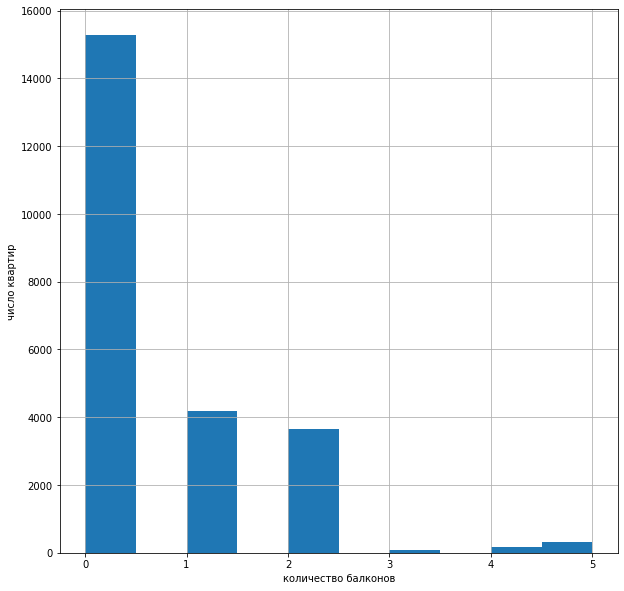

In [129]:
ax = data['balcony'].hist(bins = 10, figsize=(10,10))
ax.set_xlabel('количество балконов');
ax.set_ylabel('число квартир');

Логично предположить, что в объявлениях с квартирами без балконов это поле просто не заполнено. Заполним нулями

In [24]:
data['balcony'].fillna(0.0, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

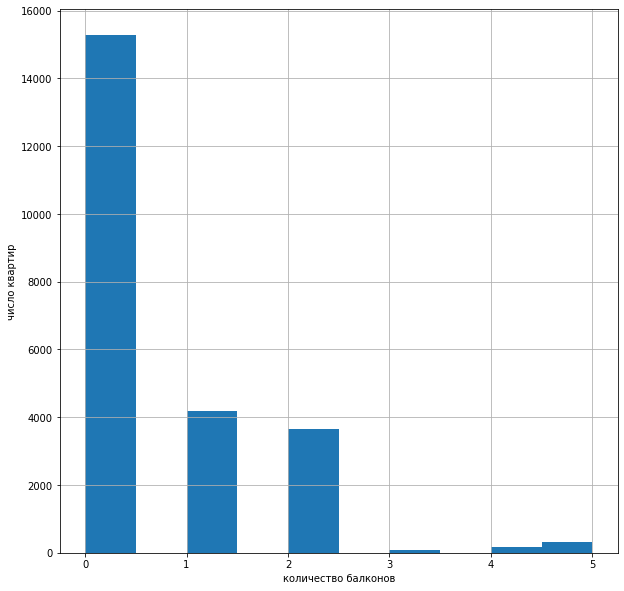

In [130]:
ax = data['balcony'].hist(bins = 10, figsize=(10,10))
ax.set_xlabel('количество балконов');
ax.set_ylabel('число квартир');

Вполне возможно. Учитывая, сколько в Питере домов без балконов, распределение похоже на реальное

##### Пропуски в столбце с жилой площадью living_area

Взглянем на данные

In [26]:
data.query('living_area.isnull()').head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenter_nan
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,False,False,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0,1
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.5,5.0,NaN,1,NaN,False,False,NaN,0.0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0,1
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN,0


Посмотрим отношение жилой площади к общей по каждому городу:

In [27]:
pivot_area = data[data['living_area'].notnull()].pivot_table(index='locality_name', values=['total_area', 'living_area'], aggfunc='mean')
pivot_area['areas_proportion'] = pivot_area['living_area'] / pivot_area['total_area']
pivot_area.describe()

,living_area,total_area,areas_proportion
count,348.000000,348.000000,348.000000
mean,30.373299,50.825392,0.593101
std,10.521006,13.867184,0.069721
min,10.500000,22.400000,0.324324
25%,25.614539,44.450000,0.552970
50%,29.983333,49.457126,0.592671
75%,32.783911,55.000000,0.638324
max,147.200000,192.300000,0.859281


Данные сильно варьируются от города к городу, и имеют большой разброс. Причем непонятно от чего он зависит. Заполним данные лучше от имеющимся значениям площади кухни

In [28]:
def set_living_area(row):
    if pd.isna(row['living_area']) & ((row['is_apartment']==False) | (pd.notna(row['is_apartment']))):
        return row['total_area'] - row['kitchen_area']
    return row['living_area']

data['living_area'] = data.apply(set_living_area, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21844 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Так лучше, оставшиеся значения вычислить из текущих параметров нельзя, поэтому оставим их пустыми

##### Пропуски в столбце с числом дней размещения объявления days_exposition

Взглянем на данные

In [29]:
data.query('days_exposition.isnull()').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenter_nan
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN,0
45,17,5200000.0,50.6,2018-12-02T00:00:00,2,2.65,9.0,30.30,7,NaN,False,False,7.0,0.0,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN,0
46,17,6600000.0,52.1,2019-01-31T00:00:00,2,2.60,24.0,29.70,9,NaN,False,False,8.3,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN,0
49,1,3050000.0,30.8,2018-11-22T00:00:00,1,2.50,9.0,18.00,7,NaN,False,False,6.0,0.0,Санкт-Петербург,45341.0,16603.0,1.0,675.0,0.0,NaN,NaN,0
52,20,11795000.0,136.0,2017-09-22T00:00:00,6,3.00,2.0,94.00,2,NaN,False,False,11.0,1.0,Санкт-Петербург,16510.0,6582.0,1.0,526.0,0.0,NaN,NaN,0
71,20,4850000.0,57.5,2019-03-27T00:00:00,3,2.50,9.0,39.00,8,NaN,False,False,6.2,0.0,Санкт-Петербург,33623.0,12267.0,1.0,334.0,1.0,333.0,NaN,0
81,9,10949000.0,68.0,2018-12-27T00:00:00,1,NaN,10.0,NaN,6,NaN,False,False,NaN,0.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
84,11,2400000.0,43.9,2019-03-13T00:00:00,2,NaN,2.0,27.46,1,NaN,False,False,5.2,0.0,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [30]:
data.query('days_exposition.isnull()').pivot_table(index='locality_name',values='last_price', aggfunc=['count','median']).sort_values(by = ('count','last_price'), ascending = False)

,count,median
,last_price,last_price
locality_name,,
Санкт-Петербург,2083,7300000.0
Пушкин,62,6050000.0
Всеволожск,59,3995000.0
Гатчина,39,3480000.0
Мурино,34,3748625.0
...,...,...
поселок городского типа Ефимовский,1,790000.0
поселок городского типа Дружная Горка,1,1200000.0


Учитывая, что нам нужно сделать основные выводы на онове статистики времнеи продажи, если мы сейчас начнем вычилсять пропущенные значения, то итоговую статистику мы можем "испортить" обратной зависимостью, которую мы сейчас посчитаем.
Этот столбец трогать не будем.

<b>Вывод:</b> мы убрали пропуски которые можно и нужно было вычислить. К сожалению, не все удалось восстановить, а что-то не трогали специально, чтобы не испортить реальную  статистику

#### Обработка артефактов и разнородность данных

Первое чем нужно заняться это унификация названий населенных пунктов, т.к. данные в столбце "locality_name" очень сильно разрознены. Для этого попробуем удалить все слова, которые не начинаются с заглавной буквы и заменить "Ё" на "Е". Для этого напишем дополнительную функцию. А чтобы всегда можно было сравнить с исходными данными запишем все в новый столбец "locality_name_short"

In [31]:
import re 

def save_capital_words(row):
    if pd.isna(row['locality_name']):
        return row['locality_name']
    #меняем Ё на Е
    locality = row['locality_name'].replace('ё','е')
    #выкидываем все слова, которые не начинаются с большой буквы
    return re.sub(r'\b[а-я]+\s*', "", locality).strip()

data['locality_name_short'] = data.apply(save_capital_words, axis=1)
data['locality_name_short'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

#### Приведение типов данных

Первый столбец, который точно нужно привести к требуемому типу это first_day_exposition, т.к. в нем хранятся строковые значения, а нам потребуется выполнять множество задач с датой-временем (на самом деле там нет "времени" как такового, т.к. это дата публикации с точностью до дней).
По визуальному обзору строк видно, что запись выглядит так: 2019-03-07T00:00:00	

In [32]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21844 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_a

Теперь тип столбца у нас datetime64, все ок.
Перейдем к floors_total, balcony, days_exposition - все эти столбцы float64 хотя должны быть int
Т.к. в них есть пропущенные значения явно преобразовать мы их не можем, поэтому оставим как есть.

То же самое с преобразованием is_apartment в boolean

<b>Вывод:</b> реально необходимым оказалось приведение даты. Остальное либо не представляется возможным сделать с текущими пропусками, либо просто не надо для конечного вывода. Данные float не стали переводит в int так как пропущенные значения мы оставили, а с NaN преобразование челого столбца невозможно.

### Шаг 3. Посчитайте и добавьте в таблицу

Добавим столбец с метрикой "цена квадратного метра", назовем его "m2_price". 

In [33]:
data['m2_price'] = data['last_price']/data['total_area']
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenter_nan,locality_name_short,m2_price
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0,Санкт-Петербург,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0,Шушары,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0,Санкт-Петербург,92785.714286
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0,Санкт-Петербург,408176.100629
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0,Санкт-Петербург,100000.000000


Теперь введем "день недели, месяц и год публикации объявления", столбцы "day_exposition, month_exposition, year_exposition" соотвественно

In [34]:
data['day_exposition'] = data['first_day_exposition'].dt.weekday 
data['month_exposition'] = data['first_day_exposition'].dt.month 
data['year_exposition'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenter_nan,locality_name_short,m2_price,day_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0,Санкт-Петербург,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0,Шушары,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0,Санкт-Петербург,92785.714286,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0,Санкт-Петербург,408176.100629,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0,Санкт-Петербург,100000.000000,1,6,2018


Далее от нас требуется вычислить на каком этаже находится квартира (первый, последний, другой).
Введем для этого дополнительную категорирующую функцию, ее результат запишем в новый столбец 'floor_category'

In [35]:
def set_floor_category(row):
    if row['floor']==1:
        return 'Первый'
    if row['floor']==row['floors_total']:
        return 'Последний'
    return 'Другой'

data['floor_category'] = data.apply(set_floor_category, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenter_nan,locality_name_short,m2_price,day_exposition,month_exposition,year_exposition,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0,Санкт-Петербург,120370.370370,3,3,2019,Другой
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0,Шушары,82920.792079,1,12,2018,Первый
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0,Санкт-Петербург,92785.714286,3,8,2015,Другой
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0,Санкт-Петербург,408176.100629,4,7,2015,Другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0,Санкт-Петербург,100000.000000,1,6,2018,Другой


Вводим дополнительные метрики по соотношениям площадей - "соотношение жилой и общей площади", а также "отношение площади кухни к общей" в новые стобцы "living_total_area_proportion" и "kitchen_total_area_proportion" соответственно

In [36]:
data['living_total_area_proportion'] = data['living_area']/data['total_area']
data['kitchen_total_area_proportion'] = data['kitchen_area']/data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenter_nan,locality_name_short,m2_price,day_exposition,month_exposition,year_exposition,floor_category,living_total_area_proportion,kitchen_total_area_proportion
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0,Санкт-Петербург,120370.370370,3,3,2019,Другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0,Шушары,82920.792079,1,12,2018,Первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0,Санкт-Петербург,92785.714286,3,8,2015,Другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0,Санкт-Петербург,408176.100629,4,7,2015,Другой,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0,Санкт-Петербург,100000.000000,1,6,2018,Другой,0.320000,0.410000


<b>Вывод:</b> мы посчитали все требующиеся от нас значения и добавили новые столбцы в исходный DataFrame

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Т.к. нам придется строить много однотипных гистограмм, то напишем сначала функцию для упрощения работы

In [37]:
def draw_hist(data_col, bins, xlabel, ylabel):
    ax = (data_col
        .plot(kind='hist', 
        histtype='step', 
        bins=bins, linewidth=5, alpha=0.7, 
        label='общая площадь',
        figsize=(15,5), grid = True)
        )
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);

#### Изучение: площадь, цена, число комнат, высота потолков

Построим гистограмму по столбцу "Общая площадь"

In [38]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

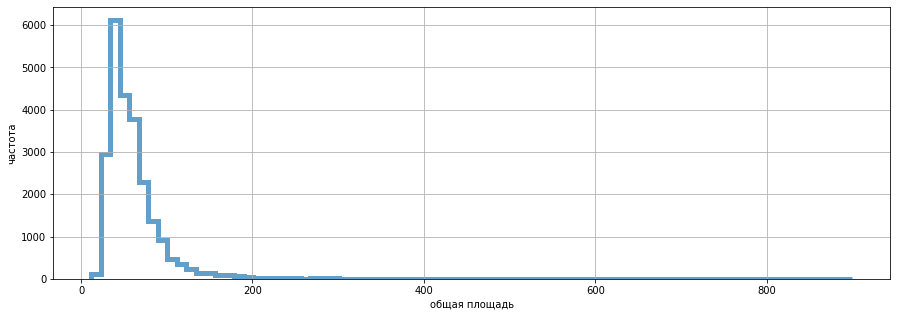

In [39]:
draw_hist(data['total_area'], 80, 'общая площадь', 'частота')

<b>Вывод:</b> гистограмма близка к нормальному распределению, но ее "клонит" немного влево, плюс есть длинных хвост справа. Явно присутствуют выбивающиеся и нетипичные значения

Построим гистограмму по столбцу "Жилая площадь"

In [40]:
data['living_area'].describe()

count    21844.000000
mean        34.496766
std         22.045182
min          2.000000
25%         18.600000
50%         30.000000
75%         42.400000
max        409.700000
Name: living_area, dtype: float64

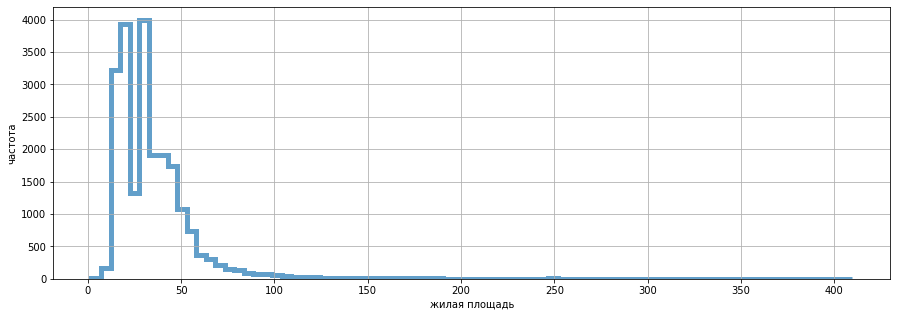

In [41]:
draw_hist(data.query('living_area.notnull()')['living_area'], 80, 'жилая площадь', 'частота')

<b>Вывод:</b> гистограмма с провалами по центру, также имеется длинных хвост справа. Есть выбросы.

Построим гистограмму по столбцу "Число комнат"

In [42]:
data.query('rooms.notnull()')['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

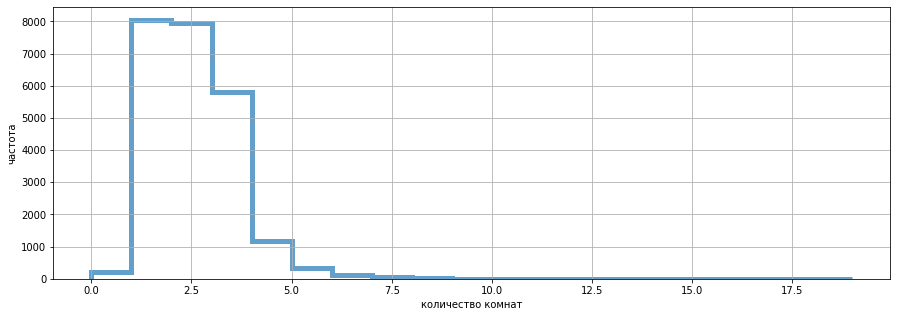

In [43]:
draw_hist(data.query('rooms.notnull()')['rooms'], 19, 'количество комнат', 'частота')

<b>Вывод:</b> гистограмма близка к нормальному распределению, но ее "клонит" немного влево, плюс есть длинных хвост справа. Явно присутствуют выбивающиеся и нетипичные значения

Построим гистограмму по столбцу "Высота потолков"

In [44]:
data.query('ceiling_height.notnull()')['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

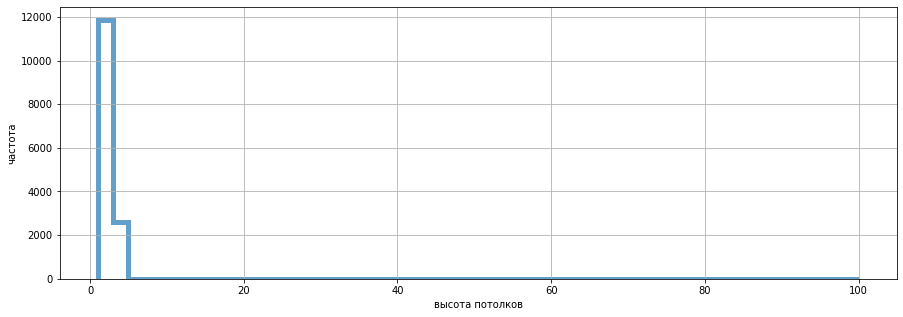

In [45]:
draw_hist(data.query('ceiling_height.notnull()')['ceiling_height'], 50, 'высота потолков', 'частота')

<b>Вывод:</b> гистограмма с оооочень длинным хвостом вправо. Плюс вместо распределения - почти узкое "плато". Такое вполне может быть ввиду того, что в среднем потолки в городах почти одинаковой высоты. Однако хвост и info() говорят о выбросах.

#### Изучение: время продажи квартиры

In [46]:
data.query('days_exposition.notnull()')['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

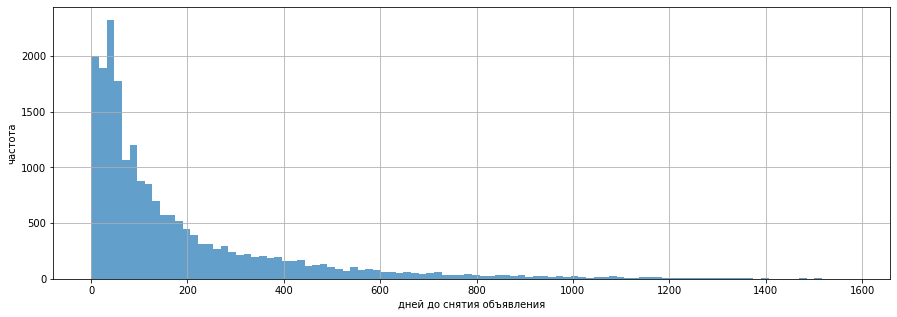

In [47]:
ax = (data.query('days_exposition.notnull()')['days_exposition']
 .plot(kind='hist', y='total_area', 
       histtype='bar', range=(1, 1580), 
       bins=100, linewidth=5, alpha=0.7, 
       label='время продажи квартиры',
       figsize=(15,5), grid = True)
)
ax.set_xlabel('дней до снятия объявления');
ax.set_ylabel('частота');

<b>Вывод:</b> Практически классическое распределение Пуассона, только с очень длинным хвостом плюс выбросами посередине. Можно сделать промежуточный вывод, что основная масса квартир продается за первые 100 дней. Среднее значение - 180 дней, медианное - 219

Судя по первому квартилю, быстрые продажи - все, что меньше 45 дней, а судя по последнему, слишком долгие продажи - больше 232 дней

#### Обработка редких и выбивающихся значений

Посмотрим на данные в целом. Сделаем describe()

In [48]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenter_nan,m2_price,day_exposition,month_exposition,year_exposition,living_total_area_proportion,kitchen_total_area_proportion
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21844.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,21844.000000,21421.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.496766,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634,0.232879,9.942166e+04,2.569307,6.400101,2017.367146,0.565300,0.187355
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.045182,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988,0.422675,5.030680e+04,1.789082,3.491561,1.039771,0.105947,0.072968
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,0.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.021583,0.025381
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000,0.000000,7.658547e+04,1.000000,3.000000,2017.000000,0.495572,0.133333
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000,0.000000,9.500000e+04,3.000000,6.000000,2017.000000,0.568421,0.172414
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.400000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000,0.000000,1.142563e+05,4.000000,10.000000,2018.000000,0.638298,0.232416
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.000000,0.787879


##### Обработка last_price

Посмотрим на boxplot для цены:

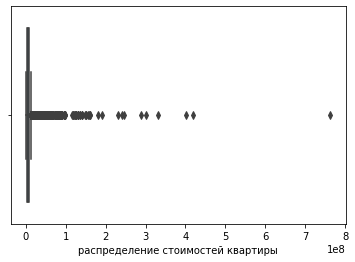

In [49]:
ax = sns.boxplot(x=data['last_price'])
ax.set_xlabel('распределение стоимостей квартиры');

Видно, что выбросов у нас очень много, но самое заметное начинается после 450 млн. Избавимся от него. Все "хорошие" данные будем обрабатывать в новом датасете data_good

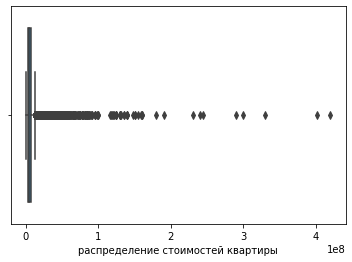

In [50]:
data_good=data.query('last_price < 450000000')
ax = sns.boxplot(x=data_good['last_price'])
ax.set_xlabel('распределение стоимостей квартиры');

In [51]:
data_good['last_price'].describe()

count    2.369800e+04
mean     6.509628e+06
std      9.715106e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799750e+06
max      4.200000e+08
Name: last_price, dtype: float64

<b>Вывод:</b> понятно, что на этом боксплоте  по прежнему много выбросов, но мы не исключаем, что в Питере могут быть настолько дорогие квартиры

##### Обработка total_area	

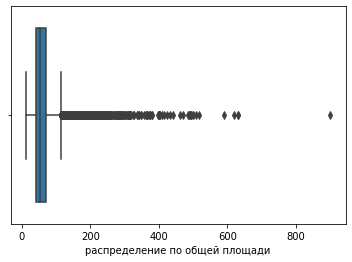

In [52]:
ax = sns.boxplot(x=data_good['total_area'])
ax.set_xlabel('распределение по общей площади');

Если смотреть на info и график, то можно определить границу в районе 700 квм

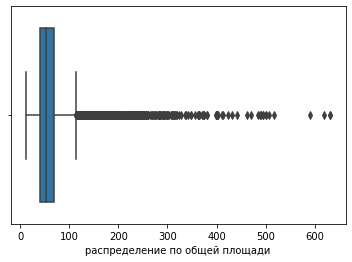

In [53]:
data_good=data_good.query('total_area < 700')
ax = sns.boxplot(x=data_good['total_area'])
ax.set_xlabel('распределение по общей площади');

<b>Вывод:</b> выбросов все равно много, но тут может сыграть роль наличие квартир в крупном городе (Питер) по сравнению с окресностями. Думаю, можно оставить так

##### Обработка rooms

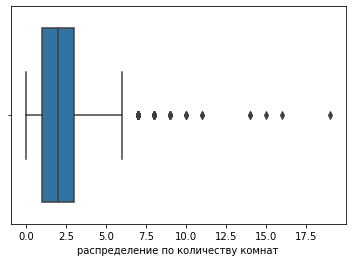

In [54]:
ax = sns.boxplot(x=data_good['rooms'])
ax.set_xlabel('распределение по количеству комнат');

Явно, что вбросы основаны на вполне реальных данных, обрежем самое "выдающееся"

In [55]:
data_good = data_good.query('rooms < 17')

<b>Вывод:</b> не стоит злоупотреблять с боксплотами, но максимальные вбросы можно и откинуть...

##### Обработка ceiling_height

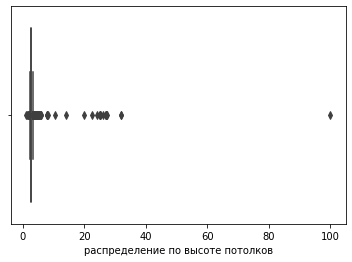

In [56]:
ax = sns.boxplot(x=data_good['ceiling_height'])
ax.set_xlabel('распределение по высоте потолков');

Обрезаем все, что выше 10м

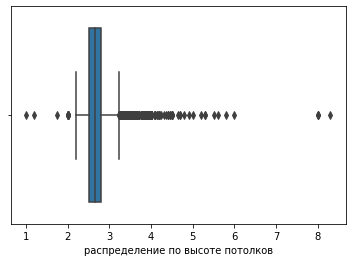

In [57]:
data_good = data_good.query('ceiling_height < 10')
ax = sns.boxplot(x=data_good['ceiling_height'])
ax.set_xlabel('распределение по высоте потолков');

In [58]:
data_good['ceiling_height'].describe()

count    14478.000000
mean         2.727975
std          0.293229
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max          8.300000
Name: ceiling_height, dtype: float64

Также выглядят нереальными данные меньше 2 метров

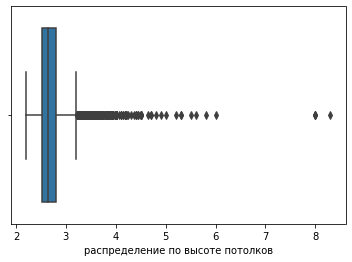

In [59]:
data_good = data_good.query('ceiling_height > 2')
ax = sns.boxplot(x=data_good['ceiling_height'])
ax.set_xlabel('распределение по высоте потолков');

<b>Вывод:</b> не исключаем, что в какой-нибудь элитной недвижимости потолки могут быть и 10 метров

##### Обработка living_area

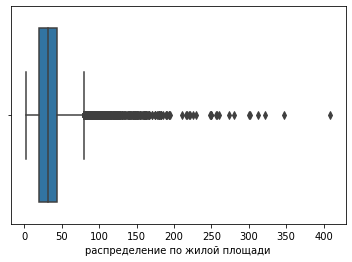

In [60]:
ax = sns.boxplot(x=data_good['living_area'])
ax.set_xlabel('распределение по жилой площади');

In [61]:
data_good['living_area'].describe()

count    13696.000000
mean        35.698731
std         22.658205
min          2.000000
25%         19.200000
50%         30.900000
75%         43.300000
max        409.000000
Name: living_area, dtype: float64

<b>Вывод:</b> не вижу ничего плохого в жилой площади в 2 м (может так считается в апартаментах) и в 409 метрах (элитная недвижимость)

#### Изучение: факторы, влияющих на цену квартиры

##### Зависимость цены от площади

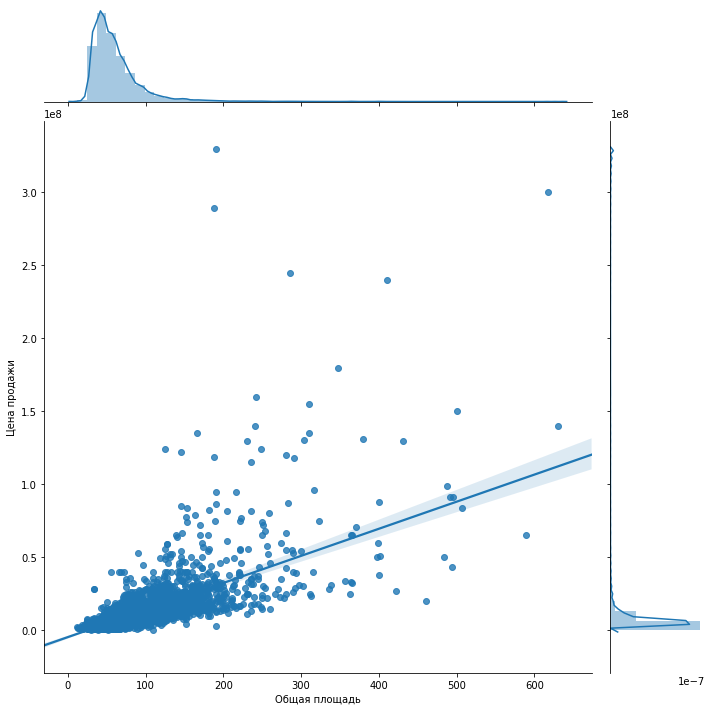

In [62]:
ax = sns.jointplot(x='total_area', y='last_price', 
              data=data_good[data_good['total_area'].notnull()], kind='reg', height=10, dropna=True);
ax.set_axis_labels('Общая площадь','Цена продажи')

In [63]:
(print('Коэффициент корреляции между общей площадью и ценой квартиры:',
       data_good[data_good['total_area']
                 .notnull()]['total_area']
       .corr(data_good[data_good['total_area']
                       .notnull()]['last_price'])))

Коэффициент корреляции между общей площадью и ценой квартиры: 0.7025852094393439


<b>Вывод:</b> на графике видна явная зависимость цены от площади, причем коэффициент корреляции равен 0.7. Чем больше площадь, тем больше цена

##### Зависимость цены от числа комнат

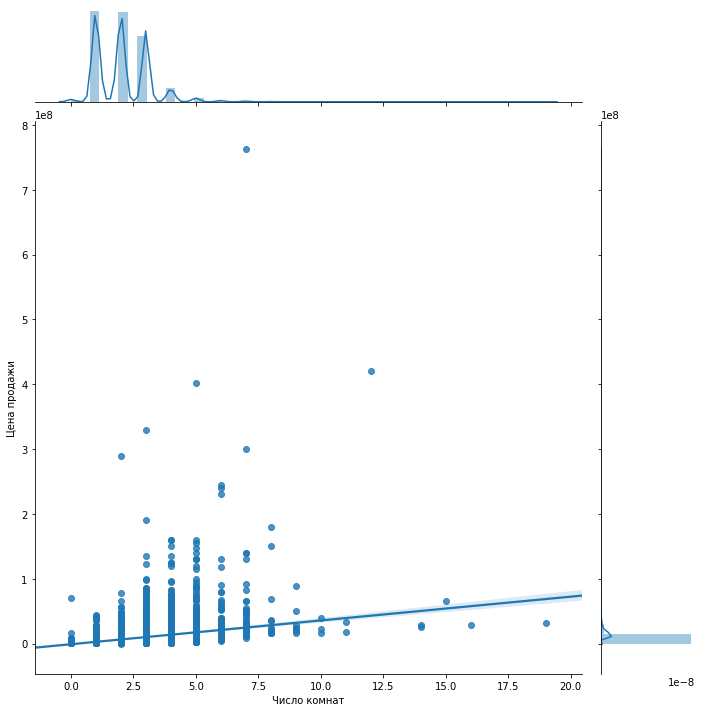

In [64]:
ax = sns.jointplot(x='rooms', y='last_price', 
              data=data[data['rooms'].notnull()], kind='reg', height=10, dropna=True);
ax.set_axis_labels('Число комнат','Цена продажи')

In [65]:
(print('Коэффициент корреляции между количеством комнат и ценой:',
       data_good[data_good['rooms']
                 .notnull()]['rooms']
       .corr(data_good[data_good['rooms']
                       .notnull()]['last_price'])))

Коэффициент корреляции между количеством комнат и ценой: 0.40108595705625893


<b>Вывод:</b> чем больше комнат, тем болше цена. Логично :). <span style="color:blue"> Но все же коэффициент корреляции не очень велик. Это может быть из за того, что "однушки", например, в центре, стоят столько же сколько и "трешки" на окраине. Либо в квартирах со свободной планировкой может быть тольк одна комната (либо в объявлении ноль), но площадь квартиры сравнима с "двушкой".

##### Зависимость цены от удалённости от центра

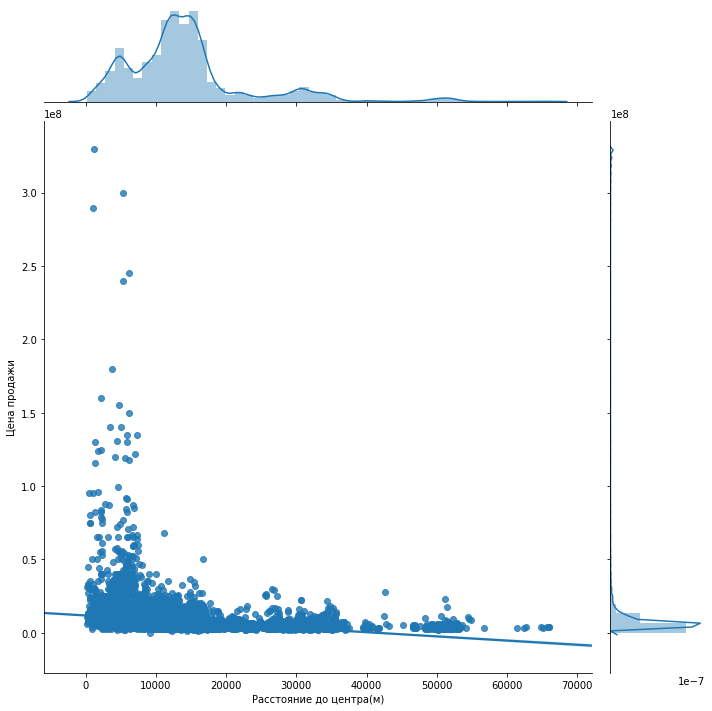

In [95]:
ax = sns.jointplot(x='cityCenters_nearest', y='last_price', 
              data=data_good[data_good['cityCenters_nearest'].notnull()], kind='reg', height=10, dropna=True);
ax.set_axis_labels('Расстояние до центра(м)','Цена продажи');

In [67]:
(print('Коэффициент корреляции между количеством комнат и ценой:',
       data_good[data_good['cityCenters_nearest']
                 .notnull()]['cityCenters_nearest']
       .corr(data_good[data_good['cityCenters_nearest']
                       .notnull()]['last_price'])))

Коэффициент корреляции между количеством комнат и ценой: -0.23982084792731384


<b>Вывод:</b> Видно, что чем ближе к центру, тем жилье дороже. Причем в центре города есть выбросы (скорее всего, относится к элитному жилью). Однако коэффициент корреляции не столь велик.

##### Зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом

In [68]:
data_good.pivot_table(index='floor_category', 
                       values='last_price', 
                       aggfunc='median')

,last_price
floor_category,
Другой,5000000.0
Первый,4070000.0
Последний,4530000.0


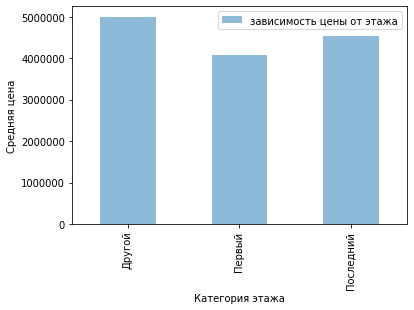

In [97]:
ax = (data_good.pivot_table(index='floor_category', 
                       values='last_price', 
                       aggfunc='median')
 .plot(kind='bar', y=('last_price'), alpha=0.5, 
                           label='зависимость цены от этажа', 
                           legend=True)
)
ax.set_xlabel('Категория этажа');
ax.set_ylabel('Средняя цена');

<b>Вывод:</b> особой зависимости нет. Стоимость квартиры в целом слабо зависит от того, на каком этаже она расположена

##### Зависимость цены от даты размещения: дня недели, месяца и года

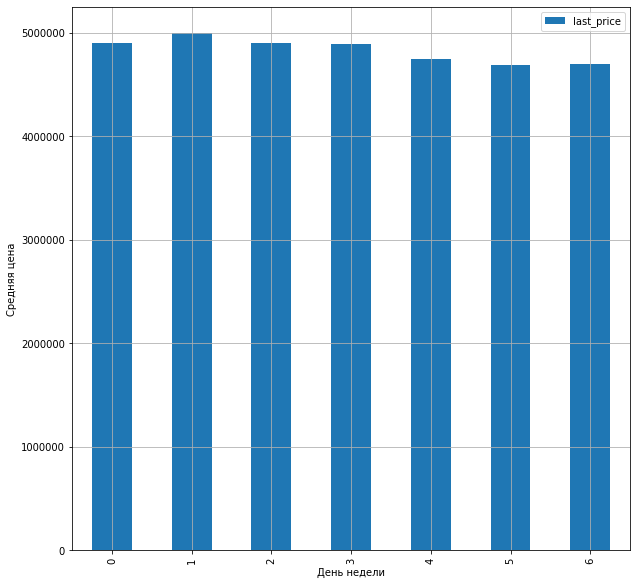

In [98]:
ax = (data_good.pivot_table(index='day_exposition', 
                       values='last_price', 
                       aggfunc='median')
         .plot(kind='bar', y='last_price', grid=True, figsize=(10, 10))
);
ax.set_xlabel('День недели');
ax.set_ylabel('Средняя цена');

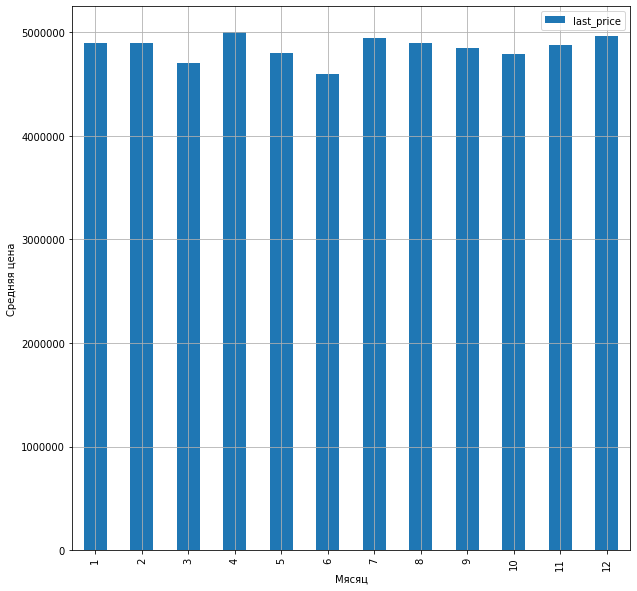

In [99]:
ax = (data_good.pivot_table(index='month_exposition', 
                       values='last_price', 
                       aggfunc='median')
         .plot(kind='bar', y='last_price', grid=True, figsize=(10, 10))
);
ax.set_xlabel('Мясяц');
ax.set_ylabel('Средняя цена');

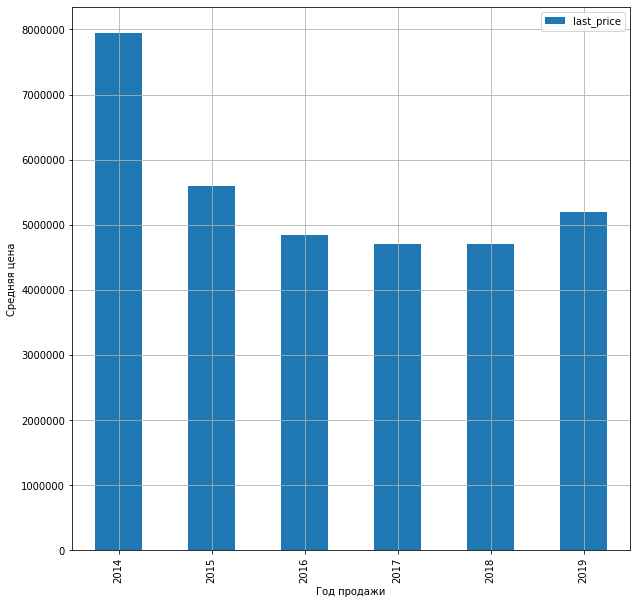

In [100]:
ax = (data_good.pivot_table(index='year_exposition', 
                       values='last_price', 
                       aggfunc='median')
         .plot(kind='bar', y='last_price', grid=True, figsize=(10, 10))
)
ax.set_xlabel('Год продажи');
ax.set_ylabel('Средняя цена');

<b>Вывод:</b> в целом цена не зависит ни от дня недели ни от месяца размещения. Однако в 2014 году медианные цены, почему-то были выше

#### Поиск: топ 10 населенных пунктов поколичеству объявлений

In [73]:
data_top_ten = (data_good.pivot_table(index='locality_name_short', 
                  values='last_price', aggfunc=['count', 'mean'])
 .sort_values(by=('count','last_price'), ascending=False)).head(10)
data_top_ten

,count,mean
,last_price,last_price
locality_name_short,,
Санкт-Петербург,10084,8.190523e+06
Всеволожск,271,3.831683e+06
Пушкин,234,6.377276e+06
Мурино,226,4.010905e+06
Шушары,217,4.253618e+06
Колпино,203,3.960373e+06
Кудрово,194,4.477604e+06
Гатчина,148,3.627804e+06


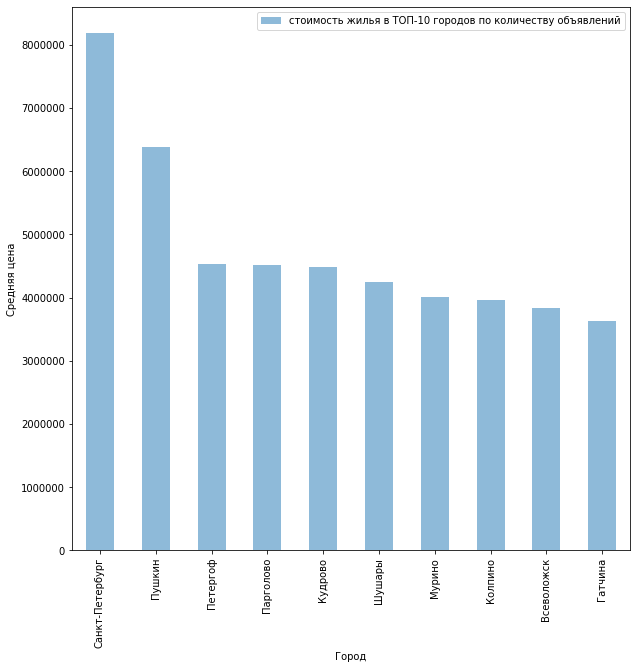

In [101]:
ax = (data_top_ten.sort_values(by=('mean','last_price'),ascending=False)
                          .plot(kind='bar', 
                           y=('mean', 'last_price'), alpha=0.5, 
                           label='стоимость жилья в ТОП-10 городов по количеству объявлений', 
                           legend=True,
                           figsize=(10, 10))) 
ax.set_xlabel('Город');
ax.set_ylabel('Средняя цена');

<b>Вывод:</b> из топ-10 городов по количеству объявлений самое дорогое жилье в Санкт-Петербурге, самое дешевое в Гатчине

#### Изучение: зависимость цены от удаленности от центра

In [102]:
data_good['center_nearest_km'] = round(data_good['cityCenters_nearest'] / 1000)

data_spb = data_good.query('(locality_name_short=="Санкт-Петербург") and (cityCenters_nearest.notnull())')
data_spb['center_nearest_km'] = round(data_spb['cityCenters_nearest'] / 1000)
data_spb['center_nearest_km'] = data_spb['center_nearest_km'].astype('int')
data_spb.pivot_table(index='center_nearest_km', values='last_price', aggfunc='mean').head(5)

,last_price
center_nearest_km,
0,2.282661e+07
1,2.197475e+07
2,1.751369e+07
3,1.124783e+07
4,1.282328e+07


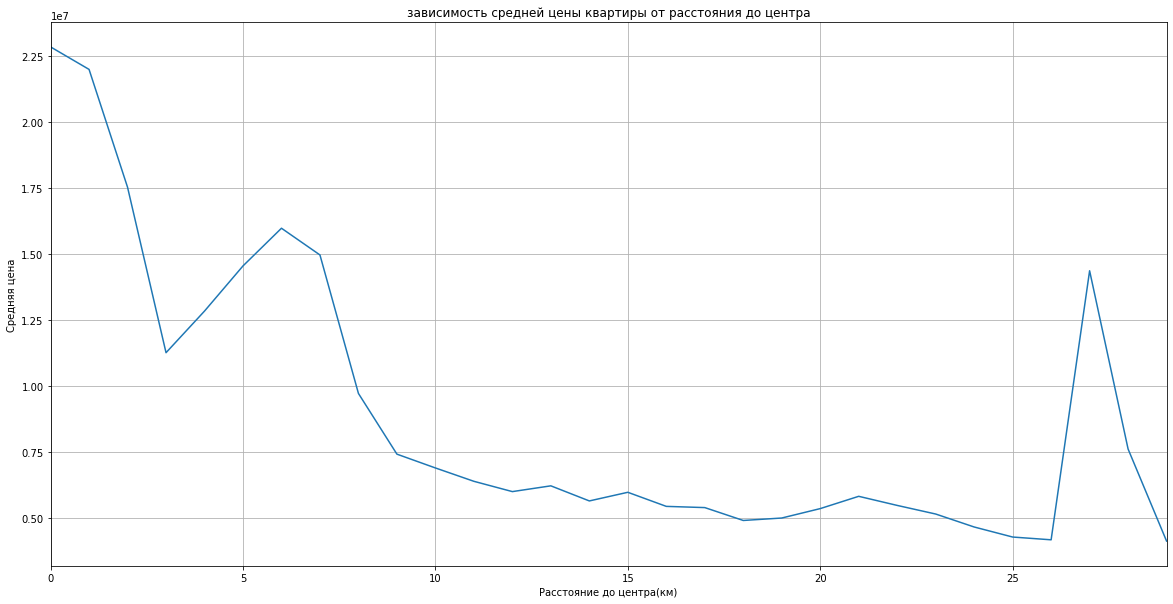

In [103]:
ax = (data_spb.pivot_table(index='center_nearest_km', values='last_price', aggfunc='mean')
        .reset_index()
        .plot(x='center_nearest_km', y='last_price', 
              grid=True, figsize=(20, 10),
              legend=False, title = "зависимость средней цены квартиры от расстояния до центра"))
ax.set_xlabel('Расстояние до центра(км)');
ax.set_ylabel('Средняя цена');

<b>Вывод:</b> по сводной таблице и графику зависимости отчетливо видно, что центр города ограничивается расстоянием 7 км. После этого цена выходит на относительно ровное "плато" (если не считать выброс после 25 км, но это, скорее всего, какой кто крупный элитный жилой комплекс).

#### Изучение: анализ квартир в центре

В предыдущем шаге мы уже поняли, что центр города это окружность примерно в 7 км. Сделаем срезы для анализа

In [77]:
data_spb_center = data_spb.query('center_nearest_km < 8')

In [78]:
data_spb_center['total_area'].describe()

count    2404.000000
mean       93.964767
std        60.025141
min        12.000000
25%        57.000000
50%        78.600000
75%       110.450000
max       631.200000
Name: total_area, dtype: float64

##### Изучим распределение площадей в центре города

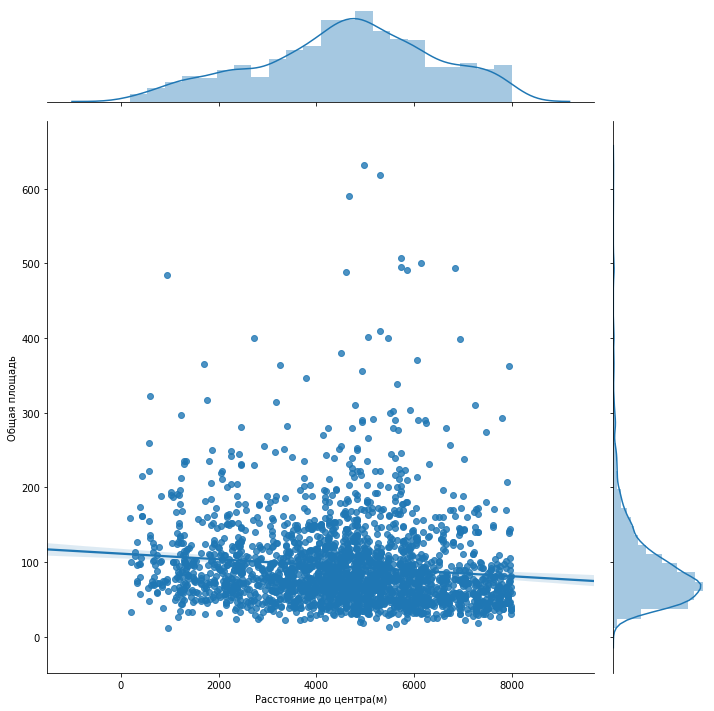

In [107]:
ax = sns.jointplot(x='cityCenters_nearest', y='total_area', 
              data=data_spb_center, kind='reg', height=10, dropna=True);
ax.set_axis_labels('Расстояние до центра(м)','Общая площадь');

In [111]:
(print('Коэффициент корреляции между близостью до центра и ценой квартиры:',
       data_spb_center[data_good['cityCenters_nearest']
                 .notnull()]['cityCenters_nearest']
       .corr(data_good[data_good['cityCenters_nearest']
                       .notnull()]['total_area'])))

Коэффициент корреляции между близостью до центра и ценой квартиры: -0.11220467826236905


<b>Вывод:</b> можно сделать вывод, что в центре города площади жилья гораздо выше, чем по статистике в целом. Самые крупные квартиры находятся где-то в средней доле центра (простите за тавталогию). Корреляция отрицательная, как и во всем городе, но зависимость меньше, т.к. элитное жилье может располагаться на всем отрезке в 7 км.

##### Изучим распределение цен в центре города

In [80]:
data_spb_center['last_price'].describe()

count    2.404000e+03
mean     1.464409e+07
std      2.026833e+07
min      1.600000e+06
25%      6.700000e+06
50%      9.200000e+06
75%      1.450025e+07
max      3.300000e+08
Name: last_price, dtype: float64

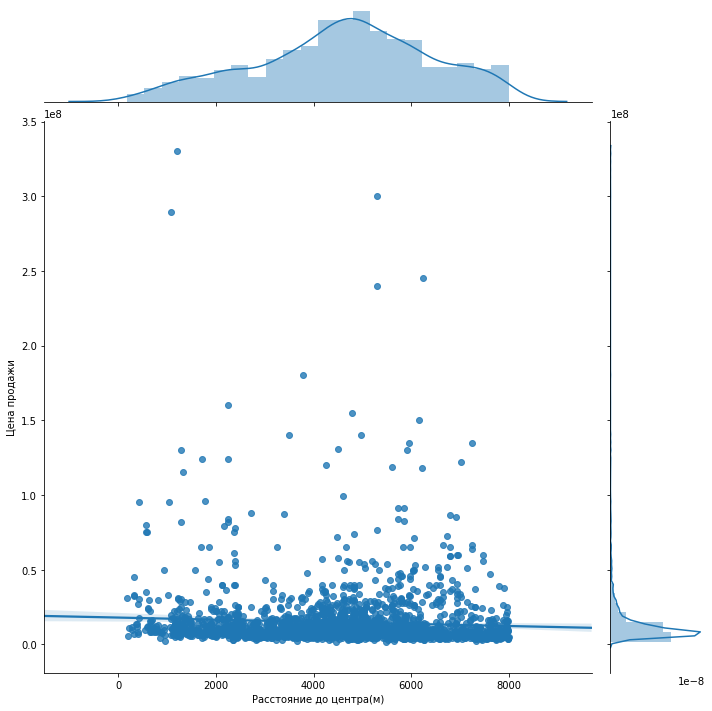

In [110]:
ax = sns.jointplot(x='cityCenters_nearest', y='last_price', 
              data=data_spb_center, kind='reg', height=10, dropna=True);
ax.set_axis_labels('Расстояние до центра(м)','Цена продажи');

In [112]:
(print('Коэффициент корреляции между близостью до центра и ценой квартиры:',
       data_spb_center[data_good['cityCenters_nearest']
                 .notnull()]['cityCenters_nearest']
       .corr(data_good[data_good['cityCenters_nearest']
                       .notnull()]['last_price'])))

Коэффициент корреляции между близостью до центра и ценой квартиры: -0.062170199070794796


<b>Вывод:</b> в целом цены в центре очень сильно отличаются от цен во всем городе, по всему расстоянию есть очень дорогое жилье, но цена также идет на убыль, чем больше мы удаляемся от центральной точки города. Корреляция отрицательная, как и во всем городе, но зависимость меньше, т.к. элитное жилье может располагаться на всем отрезке в 7 км.

##### Изучим распределение числа комнат в центре города

In [82]:
data_spb_center['rooms'].describe()

count    2404.000000
mean        2.883527
std         1.466705
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        16.000000
Name: rooms, dtype: float64

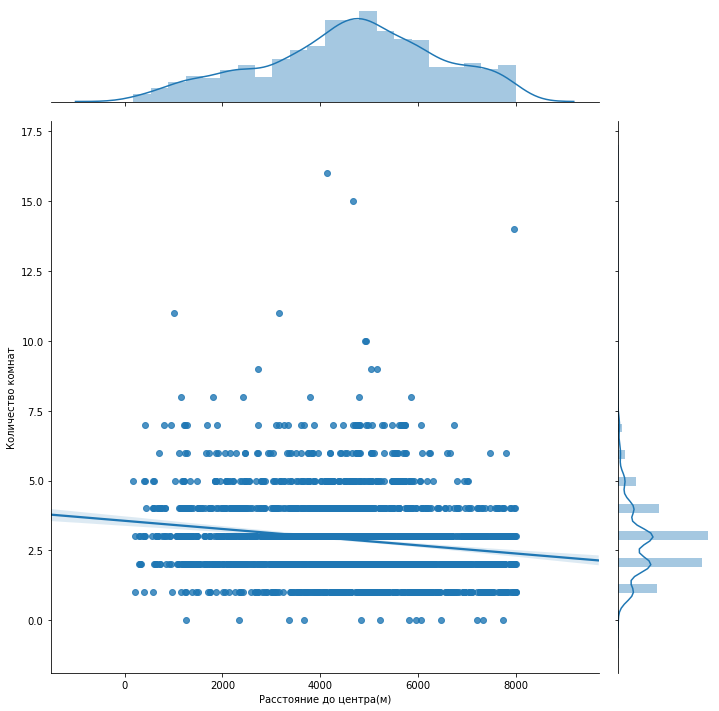

In [113]:
ax = sns.jointplot(x='cityCenters_nearest', y='rooms', 
              data=data_spb_center, kind='reg', height=10, dropna=True);
ax.set_axis_labels('Расстояние до центра(м)','Количество комнат');

In [118]:
(print('Коэффициент корреляции между близостью до центра и ценой квартиры:',
       data_spb_center[data_good['rooms']
                 .notnull()]['rooms']
       .corr(data_good[data_good['rooms']
                       .notnull()]['cityCenters_nearest'])))

Коэффициент корреляции между близостью до центра и ценой квартиры: -0.1776882660918874


<b>Вывод:</b> в центре города количество комнат резко отличается, от остальной части (ввиду наличия элитного жилья). Коэффициент корреляци небольшой, но, отрицательный (т.е. ближе к центру среднее число комнат в квартриах больше)

##### Изучим распределение высоты потолков в центре города

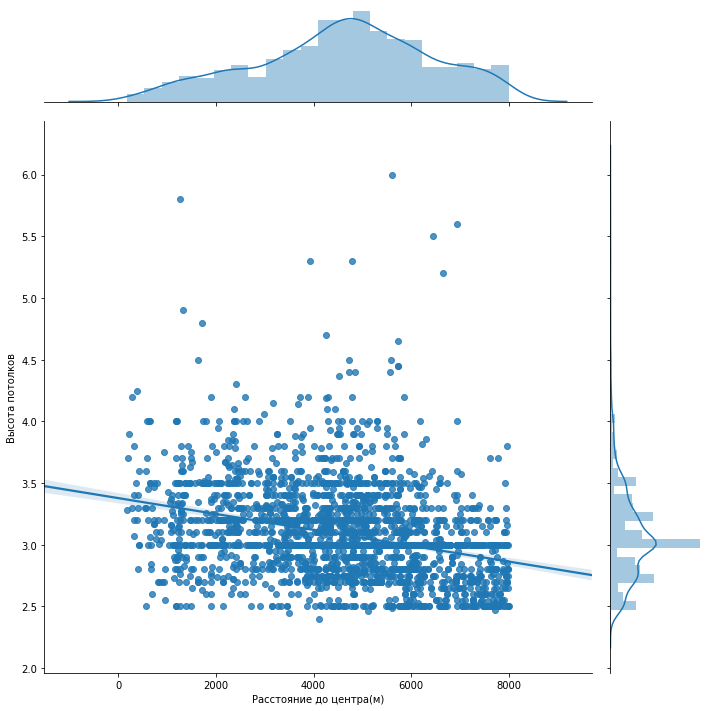

In [115]:
ax = sns.jointplot(x='cityCenters_nearest', y='ceiling_height', 
              data=data_spb_center, kind='reg', height=10, dropna=True);
ax.set_axis_labels('Расстояние до центра(м)','Высота потолков');

In [119]:
(print('Коэффициент корреляции между близостью до центра и ценой квартиры:',
       data_spb_center[data_good['ceiling_height']
                 .notnull()]['ceiling_height']
       .corr(data_good[data_good['ceiling_height']
                       .notnull()]['cityCenters_nearest'])))

Коэффициент корреляции между близостью до центра и ценой квартиры: -0.30045554942194885


<b>Вывод:</b> высота потолков в центре так же отличается от высоты в городе в целом, т.е. выше. Чем дальше от центра, тем больше идет на убыль. Зависимость есть, но коэффициент корреляции невелик.

#### Факторы, влияющие на цену в центре города

#####  Влияние числа комнат на цену

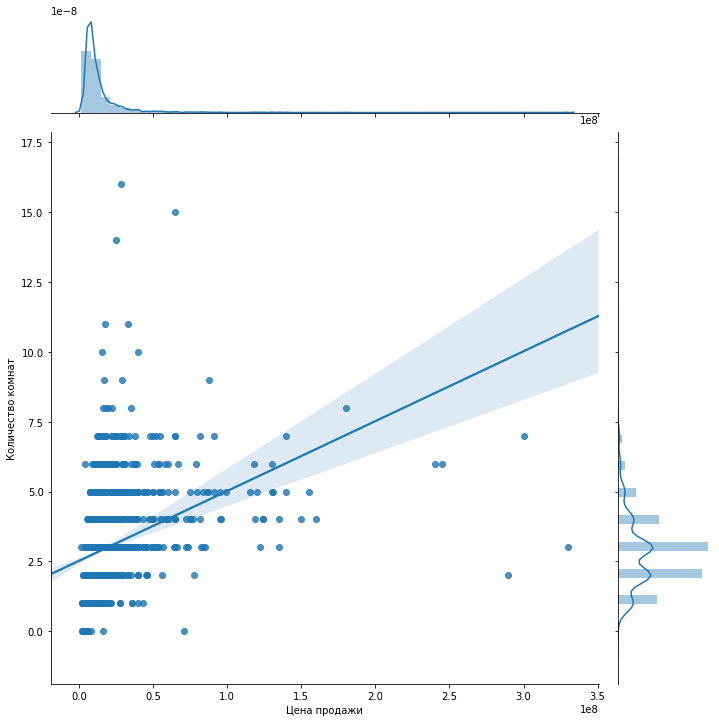

In [122]:
ax = sns.jointplot(x='last_price', y='rooms', 
              data=data_spb_center, kind='reg', height=10, dropna=True);
ax.set_axis_labels('Цена продажи','Количество комнат');

In [120]:
(print('Коэффициент корреляции между близостью до центра и ценой квартиры:',
       data_spb_center[data_good['last_price']
                 .notnull()]['last_price']
       .corr(data_good[data_good['last_price']
                       .notnull()]['rooms'])))

Коэффициент корреляции между близостью до центра и ценой квартиры: 0.34554342970143276


##### Влияние этажа на цену

In [86]:
data_spb_center.pivot_table(index='floor_category', 
                       values='last_price', 
                       aggfunc='median')

,last_price
floor_category,
Другой,9600000.0
Первый,6800000.0
Последний,9200000.0


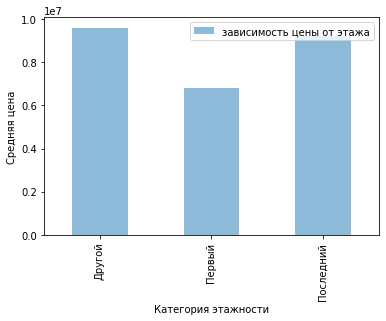

In [123]:
ax = (data_spb_center.pivot_table(index='floor_category', 
                       values='last_price', 
                       aggfunc='median')
 .plot(kind='bar', y=('last_price'), alpha=0.5, 
                           label='зависимость цены от этажа', 
                           legend=True)
)
ax.set_xlabel('Категория этажности');
ax.set_ylabel('Средняя цена');

#####  Влияние удалённости от центра на цену

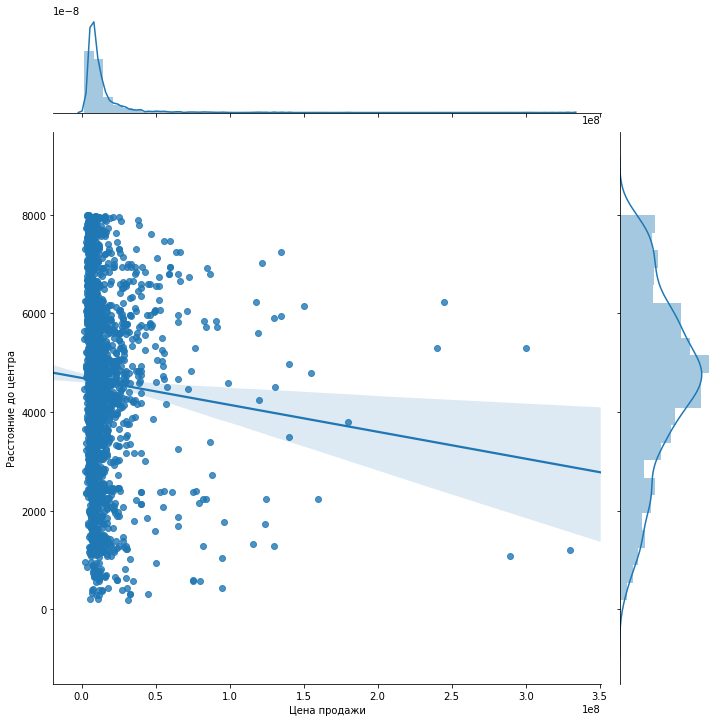

In [124]:
ax = sns.jointplot(x='last_price', y='cityCenters_nearest', 
              data=data_spb_center, kind='reg', height=10, dropna=True);
ax.set_axis_labels('Цена продажи','Расстояние до центра');

In [125]:
(print('Коэффициент корреляции между близостью до центра и ценой квартиры:',
       data_spb_center[data_good['last_price']
                 .notnull()]['last_price']
       .corr(data_good[data_good['last_price']
                       .notnull()]['cityCenters_nearest'])))

Коэффициент корреляции между близостью до центра и ценой квартиры: -0.06217019907079479


##### Влияние даты размещения объявления на цену

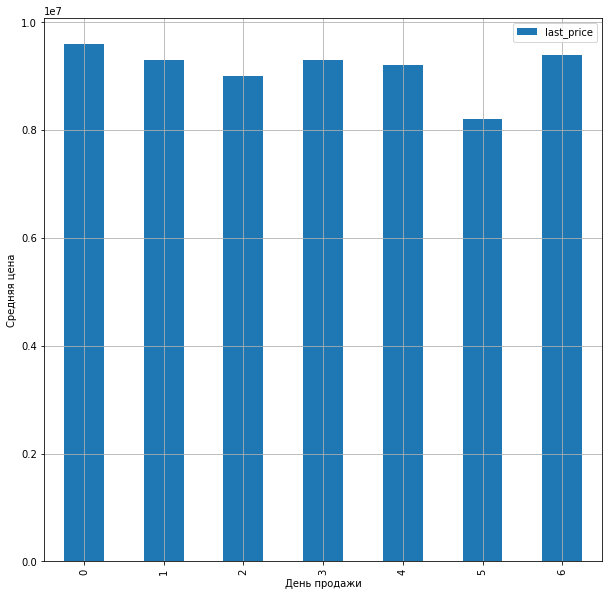

In [126]:
ax = (data_spb_center.pivot_table(index='day_exposition', 
                       values='last_price', 
                       aggfunc='median')
         .plot(kind='bar', y='last_price', grid=True, figsize=(10, 10))
);
ax.set_xlabel('День продажи');
ax.set_ylabel('Средняя цена');

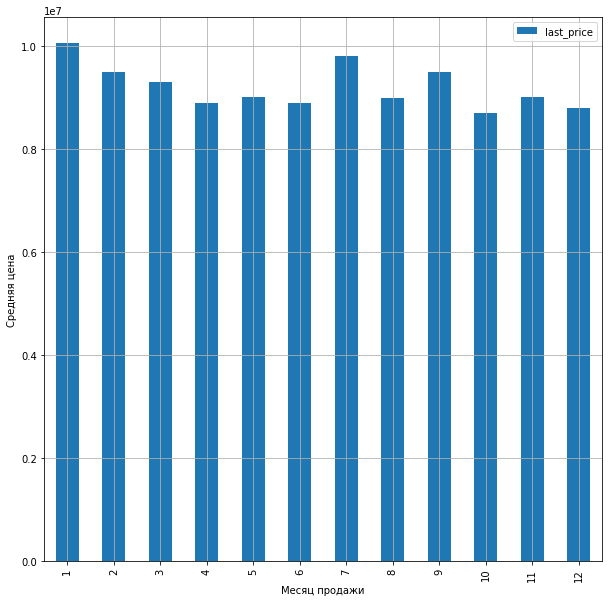

In [127]:
ax = (data_spb_center.pivot_table(index='month_exposition', 
                       values='last_price', 
                       aggfunc='median')
         .plot(kind='bar', y='last_price', grid=True, figsize=(10, 10))
);
ax.set_xlabel('Месяц продажи');
ax.set_ylabel('Средняя цена');

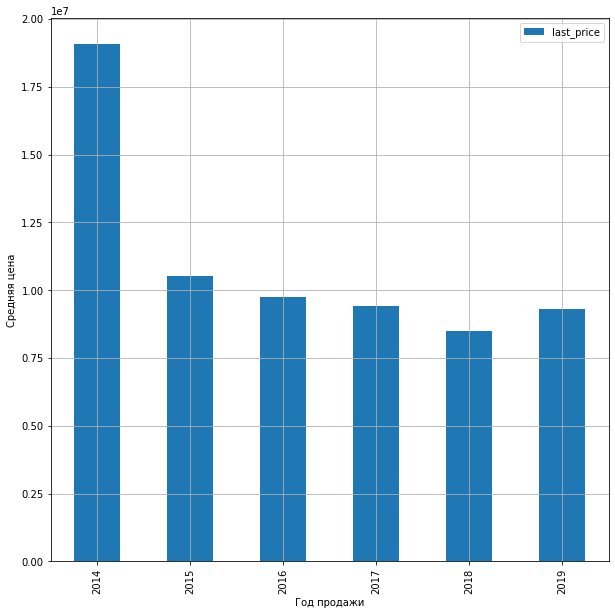

In [128]:
ax = (data_spb_center.pivot_table(index='year_exposition', 
                       values='last_price', 
                       aggfunc='median')
         .plot(kind='bar', y='last_price', grid=True, figsize=(10, 10))
)
ax.set_xlabel('Год продажи');
ax.set_ylabel('Средняя цена');

<b>Вывод:</b> для центра города все вышеперечисленные факторы идентичны по зависимиости с объявлениями в целом

### Шаг 5. Общий вывод

В данном проекте мы изучили предложения Яндекс.Недвижимости по Санкт-Петербургу и окресностям со стороны зависимостей между параметрами сделки и результатами (конечная цена, количество дней за которое произошла продажа)

Изначально массив содержал множество пропусков и неточностей, которые пришлось разобрать в предобработке. Ряд данных мы заполнили (часть высоты потолков, количество балконов), ряд оставили как есть (время снятия объявления с продажи, количество комнат и т.д.), чтобы не испортить реальную статистику, ввиду того, что эти значения не поддаются вычислению на основе текущего массива.

На основе подготовленных данных мы исследовали распределение параметров жилья, а также сделали выводы о зависимостях цен квартир от разных факторов по данным в целом, а также для центра в частности используя как визуальные методы (графики), так и численные.

Было интересно :)